This notebook shows the method to calculate the (approximate) distance between two GPS cordinates on the earths surface as discussed in https://www.lunarip.com/arclen post. 

In [1]:
from math import acos,asin, cos, radians, sin, sqrt
def arclen(lat_a,lon_a,lat_b,lon_b):
  r = 6370 #note this is for KM distance
  a1,a2, = (radians(lat_a),radians(lon_a)) 
  b1,b2 = (radians(lat_b),radians(lon_b))
  delta_lat = b1-a1
  delta_lon = b2-a2
  n = abs(sin(delta_lat/2) **2 + cos(a1)*cos(a2)*(sin(delta_lon/2) **2))
  if n >1:
    n = 1
  return 2 *r * asin(sqrt(n))

def great_circle(lat_a, lon_a, lat_b, lon_b):
    r = 6370 #note this is for KM distance
    a1,a2, = (radians(lat_a),radians(lon_a)) 
    b1,b2 = (radians(lat_b),radians(lon_b))    
    return r*(acos(sin(a1) * sin(b2) + cos(a1) * cos(b1) * cos(a2-b2)))

Some knowns GPS cordinates, some geographically close, and then others in other hemispheres to validate the error ranges. 

Western US:
- Vancouver 	49.25 	-123.1
- Portland 	45.52 	-122.68
- San Francisco 	37.78 	-122.42
- Seattle 	47.62 	-122.33

Texas:
- San Antonio 	29.42 	-98.5
- Dallas 	32.78 	-96.8
- Austin 	30.25 	-97.75

Europe:
- Dublin 	53.35 	-6.27
- Sevilla 	37.38 	-5.98
- Belfast 	54.6

- Sydney 	-33.87 	151.22
- Canberra 	-35.3 	149.12
- Tokyo 	35.68 	139.7


In [2]:
Vancouver = ('Vancouver',49.25,-123.1)
Portland = ('Portland',45.52,-122.68)
SanFrancisco=('San Francisco',37.78, -122.42)
Seattle = ('Seattle',47.62, -122.33)
SanAntonio=('San Antonio',29.42, -98.5)
Dallas = ('Dallas',32.78,-96.8)
Austin = ('Austin',30.25,-97.75)

Dublin = ('Dublin',53.35, -6.27)
Sevilla = ('Sevilla',37.38, -5.98)
Belfast = ('Belfast',54.6,-5.93)

Sydney = ('Sydney',-33.87, 151.22)
Canberra = ('Canberra',-35.3, 149.12)
Tokyo = ('Tokyo',35.68, 139.7)


In [3]:
# San Francisco to Seattle
name_a,lat_a,lon_a = SanFrancisco
name_b,lat_b, lon_b = Seattle
distance_hs = arclen(lat_a,lon_a,lat_b,lon_b)
distance_gc = great_circle(lat_a,lon_a,lat_b,lon_b)
print(f'Great circle arc lenght between {name_a} and {name_b} via haversine is {distance_hs}km')
print(f'Great circle arc lenght between {name_a} and {name_b} via great circle is {distance_gc}km')


Great circle arc lenght between San Francisco and Seattle via haversine is 1093.966852329894km
Great circle arc lenght between San Francisco and Seattle via great circle is 9909.903466568278km


  https://dateandtime.info/distance.php?id1=5809844&id2=5391959 indicates that the distance is 1094KM

In [4]:
name_a,lat_a,lon_a = SanFrancisco
name_b,lat_b, lon_b = Dublin
distance_hs = arclen(lat_a,lon_a,lat_b,lon_b)
distance_gc = great_circle(lat_a,lon_a,lat_b,lon_b)
print(f'Great circle arc lenght between {name_a} and {name_b} via haversine is {distance_hs}km')
print(f'Great circle arc lenght between {name_a} and {name_b} via great circle is {distance_gc}km')

Great circle arc lenght between San Francisco and Dublin via haversine is 7201.240084964116km
Great circle arc lenght between San Francisco and Dublin via great circle is 11779.508269517952km


https://dateandtime.info/distance.php?id1=5391959&id2=2964574 indicates that the distance is 
8188 km

In [5]:
name_a,lat_a,lon_a = Dublin
name_b,lat_b, lon_b = Sydney
distance_hs = arclen(lat_a,lon_a,lat_b,lon_b)
distance_hs = great_circle(lat_a,lon_a,lat_b,lon_b)
print(f'Great circle arc lenght between {name_a} and {name_b} via haversine is {distance_hs}km')
print(f'Great circle arc lenght between {name_a} and {name_b} via great circle is {distance_gc}km')

Great circle arc lenght between Dublin and Sydney via haversine is 10462.486162359213km
Great circle arc lenght between Dublin and Sydney via great circle is 11779.508269517952km


https://dateandtime.info/distance.php?id1=5391959&id2=2147714 indicatges that the distance is 11961 km

In [6]:
name_a,lat_a,lon_a = Tokyo
name_b,lat_b, lon_b = Sydney
distance_hs = arclen(lat_a,lon_a,lat_b,lon_b)
distance_hs = great_circle(lat_a,lon_a,lat_b,lon_b)
print(f'Great circle arc lenght between {name_a} and {name_b} via haversine is {distance_hs}km')
print(f'Great circle arc lenght between {name_a} and {name_b} via great circle is {distance_gc}km')

Great circle arc lenght between Tokyo and Sydney via haversine is 2186.4827275862635km
Great circle arc lenght between Tokyo and Sydney via great circle is 11779.508269517952km


https://dateandtime.info/distance.php?id1=1850147&id2=2147714 indicates that the distance is 7835 km

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

In [8]:
Center = ('Center',0,0)
         
Cities = [Vancouver,Portland, SanFrancisco, Seattle, 
          SanAntonio, Dallas, Austin, Dublin, Sevilla, 
          Belfast, Sydney, Canberra, Tokyo]

In [9]:
g_origin,lat_o, lon_o = Center
nodes = []
for c in Cities:
    name,lat,lon = c
    nodes.append(name)
    G.add_node(name)
    G.add_edge(name,g_origin)
    G.edges[g_origin,name]['distance'] = round(great_circle(lat_o,lon_o,lat,lon),1)

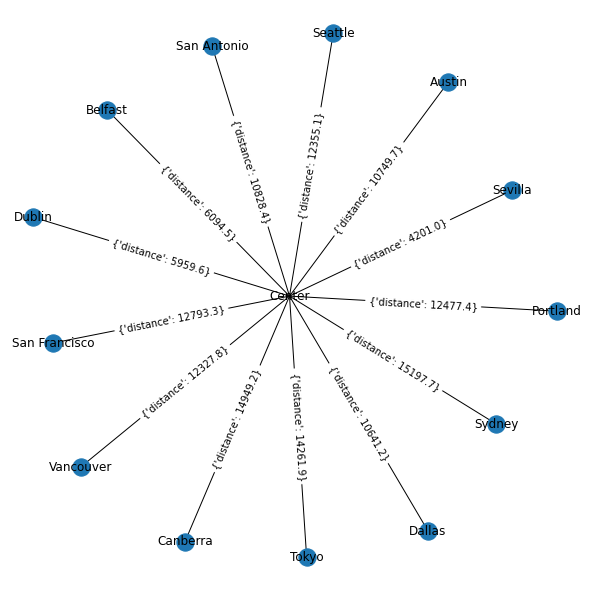

In [10]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
#label_pos = {k:[v0, v1+.2] for k, (v0,v1) in pos.items()}
nx.draw(G,nodelist=nodes,with_labels=True,pos=pos)
_ = nx.draw_networkx_edge_labels(G,pos=pos)